# Homework3

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
data_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/licenses_fall2022.csv'
licenses = pd.read_csv(data_url)

In [3]:
licenses.head()

,_id,License Type,Description,License Number,License Status,Business,Title,First Name,Middle,Last Name,...,Specialty/Qualifier,Controlled Substance Schedule,Delegated Controlled Substance Schedule,Ever Disciplined,LastModifiedDate,Case Number,Action,Discipline Start Date,Discipline End Date,Discipline Reason
0,1189509,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129446286,NOT RENEWED,N,NaN,EILEEN,NaN,SANTACRUZ,...,None,None,None,N,03/18/2022,None,None,None,None,None
1,801037,DETECTIVE BOARD,FIREARM CONTROL CARD,229030294.0,NOT RENEWED,N,NaN,DAGMAR,J,NORDLUND,...,None,None,None,N,08/16/2006,None,None,None,None,None
2,365129,COSMO,LICENSED COSMETOLOGIST,11053076.0,NOT RENEWED,N,NaN,RADOJE,NaN,ZELENOVIC,...,None,None,None,N,05/26/2006,None,None,None,None,None
3,595427,COSMO,LICENSED COSMETOLOGIST,11295645.0,ACTIVE,N,NaN,BECKY SUE,L,BURROUGHS,...,None,None,None,N,11/12/2021,None,None,None,None,None
4,653668,COSMO,LICENSED NAIL TECHNICIAN,169006247,NOT RENEWED,N,NaN,BILL G,L,LETNER,...,None,None,None,N,05/30/2006,None,None,None,None,None


In [4]:
licenses.index # number of rows in this dataset is 10000

RangeIndex(start=0, stop=10000, step=1)

In [5]:
licenses.columns

Index(['_id', 'License Type', 'Description', 'License Number',
       'License Status', 'Business', 'Title', 'First Name', 'Middle',
       'Last Name', 'Prefix', 'Suffix', 'Business Name', 'BusinessDBA',
       'Original Issue Date', 'Effective Date', 'Expiration Date', 'City',
       'State', 'Zip', 'County', 'Specialty/Qualifier',
       'Controlled Substance Schedule',
       'Delegated Controlled Substance Schedule', 'Ever Disciplined',
       'LastModifiedDate', 'Case Number', 'Action', 'Discipline Start Date',
       'Discipline End Date', 'Discipline Reason'],
      dtype='object')

## Relationship between the Original Issue Year and the Expiration Year

**get original issue year**

In [6]:
licenses['Original Issue Date'] = pd.to_datetime(licenses['Original Issue Date'],errors='coerce',format='%m/%d/%Y')

In [7]:
licenses['Original Issue Year'] = licenses['Original Issue Date'].dt.year

**get expiration year**

In [8]:
licenses['Expiration Date'] = pd.to_datetime(licenses['Expiration Date'],errors='coerce',format='%m/%d/%Y')

In [9]:
licenses['Expiration Year'] = licenses['Expiration Date'].dt.year

**creat visual**

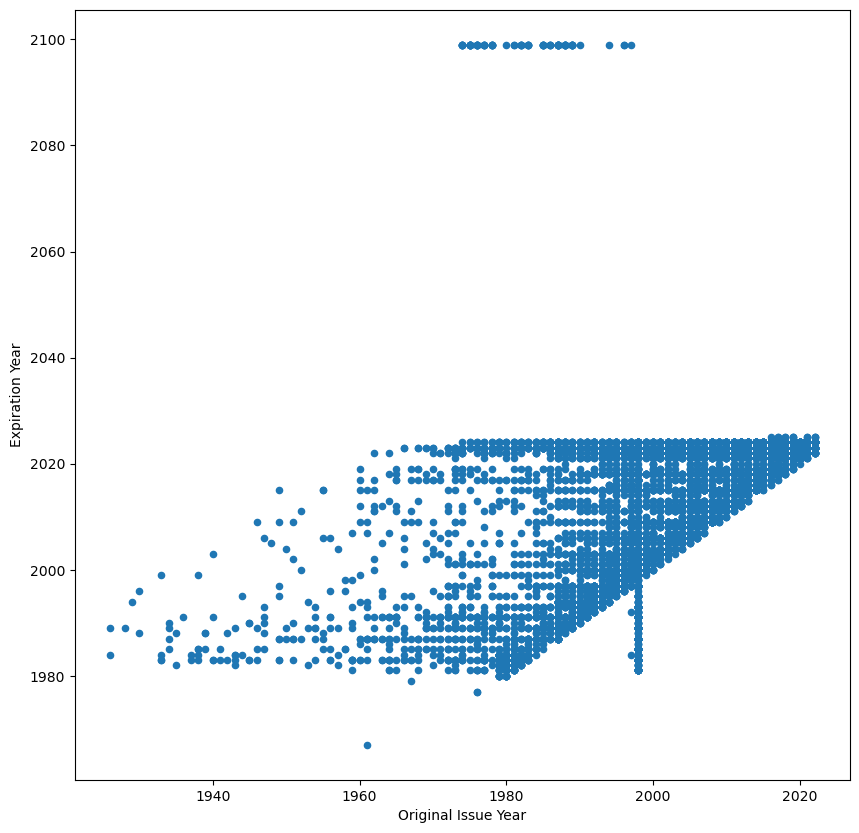

In [10]:
licenses.plot(x='Original Issue Year', y='Expiration Year', figsize=(10,10),kind='scatter')
plt.show()

Because there are several outliers, I removed the rows with null values in expiration date and issue date. But I found there was no difference between removing the null value and not. Therefore, I check if real values cause the outliers, I use 	``licenses[licenses['Expiration Year'] > 2030]`` to check them, and found they really exist.  
Besides, I found some data that the original issue year is around 2000 are not correct because their expiration year is before 2000.

## Average Effective Year as a function of License Type

**get average effective year of each type**

In [11]:
licenses['Effective Date'] = pd.to_datetime(licenses['Effective Date'],errors='coerce',format='%m/%d/%Y')

In [12]:
licenses['Effective Year'] = licenses['Effective Date'].dt.year

In [13]:
avg = licenses.groupby("License Type")["Effective Year"].describe()
avg

,count,mean,std,min,25%,50%,75%,max
License Type,,,,,,,,
APPRAISAL,5.0,2009.600000,3.974921,2004.0,2007.00,2011.0,2013.00,2013.0
ARCHITECT,18.0,2011.611111,16.403511,1950.0,2010.50,2017.0,2020.00,2021.0
ATHLETIC TRAINER,14.0,2015.357143,7.023117,2000.0,2011.25,2017.5,2021.50,2022.0
ATHLETICS,15.0,2000.933333,16.210520,1976.0,1984.00,2007.0,2016.00,2019.0
AUCTIONEER,2.0,2015.000000,7.071068,2010.0,2012.50,2015.0,2017.50,2020.0
CEMETERY OVERSIGHT,1.0,2016.000000,NaN,2016.0,2016.00,2016.0,2016.00,2016.0
CLIN PSYCHOLOGIST,11.0,2018.363636,4.717472,2008.0,2020.00,2020.0,2020.00,2022.0
COLLECTION AGENCY,19.0,2010.315789,12.087885,1980.0,2002.50,2012.0,2021.00,2022.0
COMM ASSOC MGR,37.0,2018.837838,3.068781,2011.0,2017.00,2021.0,2021.00,2022.0


In [14]:
licenses_type = list(avg.index)
licenses_type

['APPRAISAL',
 'ARCHITECT',
 'ATHLETIC TRAINER',
 'ATHLETICS',
 'AUCTIONEER',
 'CEMETERY OVERSIGHT',
 'CLIN PSYCHOLOGIST',
 'COLLECTION AGENCY',
 'COMM ASSOC MGR',
 'COSMO',
 'DENTAL',
 'DESIGN FIRM',
 'DETECT. DECEPTION',
 'DETECTIVE BOARD',
 'DIETETIC AND NUTRITION',
 'ENVIRON. HLTH PRACT',
 'FUNERAL AND EMBALMER',
 'GEOLOGY',
 'HME AND SERVICES PROV',
 'HOME INSPECTOR',
 'IDPR',
 'INTERIOR DESIGN',
 'LAND SURVEYOR BOARD',
 'LANDSCAPE ARCHITECT',
 'LIMITED LIABILITY CO',
 'MAR AND FAM THERAPIST',
 'MASSAGE LICENSING BD',
 'MEDICAL BOARD']

**make plot**

In [15]:
def make_avg_plot(style):
    with plt.style.context(style):
        
        y_pos = np.arange(len(avg))
        fig, ax = plt.subplots(figsize=(15,10))
        ax.barh(licenses_type, avg['mean'], align='center')
        ax.set_yticks(y_pos)
        ax.set_xlabel("Avg Effective Year")
        
        plt.xlim(1970,2030)
    plt.show()

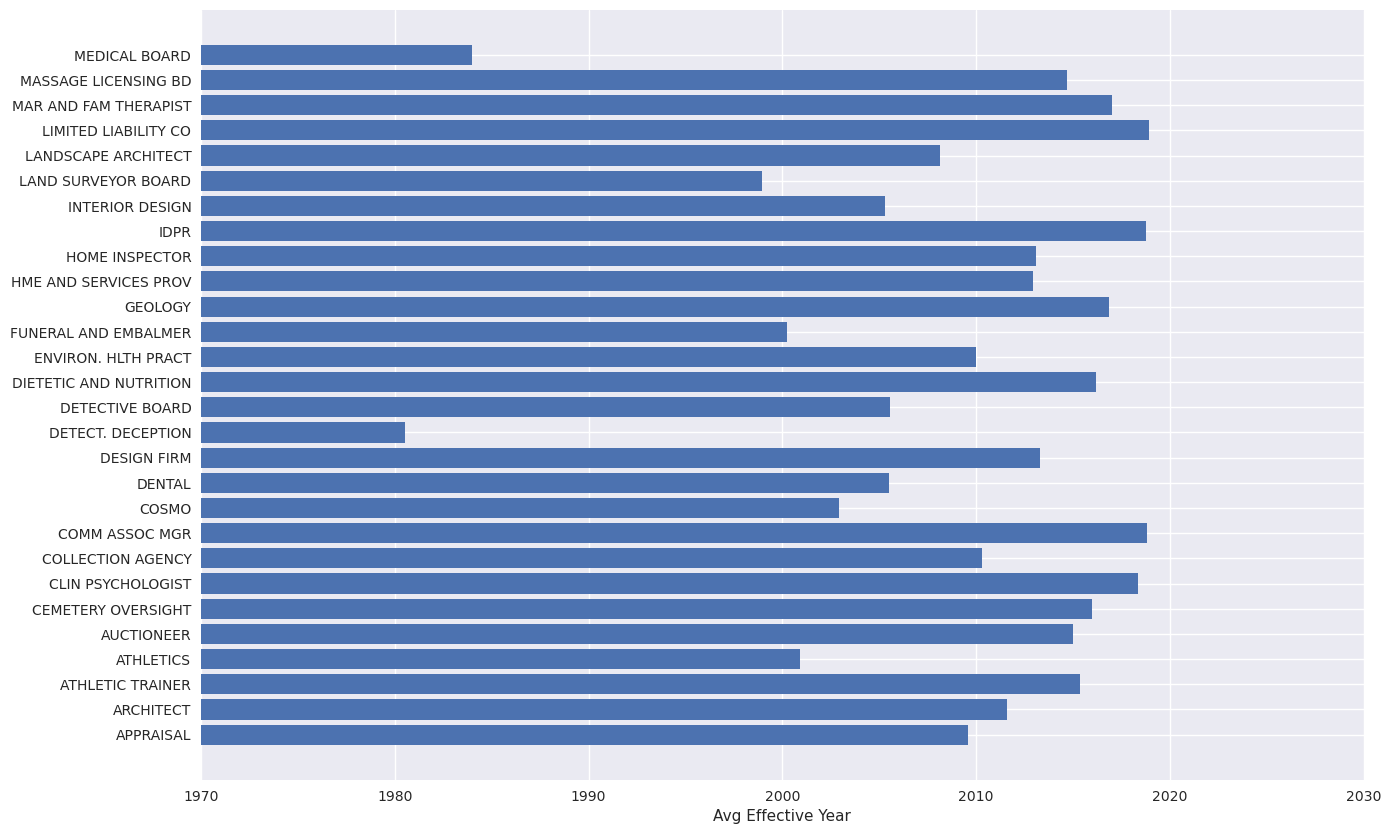

In [16]:
make_avg_plot('seaborn')

The first thing is to get the average effective year of each group with ``groupby`` function.  
The original range of the x-axis is from zero to 2020, but it causes all bars to have similar lengths. Therefore, I adjust the range of the x-axis.  
The average effective years of "Detect. deception" and "medical board" are much earlier than other types. Maybe we need to see the maximum and minimum of these two types to determine why.

## Median Effective Month in each Effective Issue Year as a function of median Original Issue Year

**get median effective month and median original issue year of each Effective Issue Year**

In [17]:
licenses['Effective Month'] = licenses['Effective Date'].dt.month

In [18]:
median_month = licenses.groupby("Effective Year")["Effective Month"].describe()
median_month

,count,mean,std,min,25%,50%,75%,max
Effective Year,,,,,,,,
1912.0,1.0,7.000000,NaN,7.0,7.00,7.0,7.00,7.0
1918.0,1.0,9.000000,NaN,9.0,9.00,9.0,9.00,9.0
1919.0,2.0,8.500000,0.707107,8.0,8.25,8.5,8.75,9.0
1923.0,1.0,8.000000,NaN,8.0,8.00,8.0,8.00,8.0
1926.0,5.0,4.200000,4.438468,1.0,1.00,1.0,8.00,10.0
...,...,...,...,...,...,...,...,...
2018.0,422.0,6.218009,3.019314,1.0,4.00,6.0,9.00,12.0
2019.0,316.0,7.047468,2.857620,1.0,5.00,8.0,9.00,12.0
2020.0,357.0,8.448179,2.732601,1.0,8.00,9.0,10.00,12.0


In [19]:
median_issue_year = licenses.groupby("Effective Year")['Original Issue Year'].describe()
median_issue_year

,count,mean,std,min,25%,50%,75%,max
Effective Year,,,,,,,,
1912.0,1.0,1912.000000,NaN,1912.0,1912.0,1912.0,1912.0,1912.0
1918.0,1.0,1918.000000,NaN,1918.0,1918.0,1918.0,1918.0,1918.0
1919.0,2.0,1919.000000,0.000000,1919.0,1919.0,1919.0,1919.0,1919.0
1923.0,1.0,1923.000000,NaN,1923.0,1923.0,1923.0,1923.0,1923.0
1926.0,5.0,1926.000000,0.000000,1926.0,1926.0,1926.0,1926.0,1926.0
...,...,...,...,...,...,...,...,...
2018.0,422.0,2010.040284,10.407187,1973.0,2006.0,2015.0,2018.0,2018.0
2019.0,316.0,2009.424051,13.455061,1962.0,2001.0,2017.0,2019.0,2019.0
2020.0,357.0,2011.215686,9.105868,1977.0,2005.0,2013.0,2020.0,2020.0


**make plot**

In [20]:
def make_median_plot(style):
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(10,10))
        ax.plot(median_month['50%'],marker='.', label='median effective month', color='tab:blue')
        ax.set_xlabel("Effective Year")
        ax.set_ylabel("Month")
        ax.legend(loc=2)
        
        ax2 = ax.twinx()
        ax2.plot(median_issue_year['50%'],marker='.', label='median Original Issue Year')
        ax2.set_ylabel("Year")
        ax2.legend()
    plt.show()

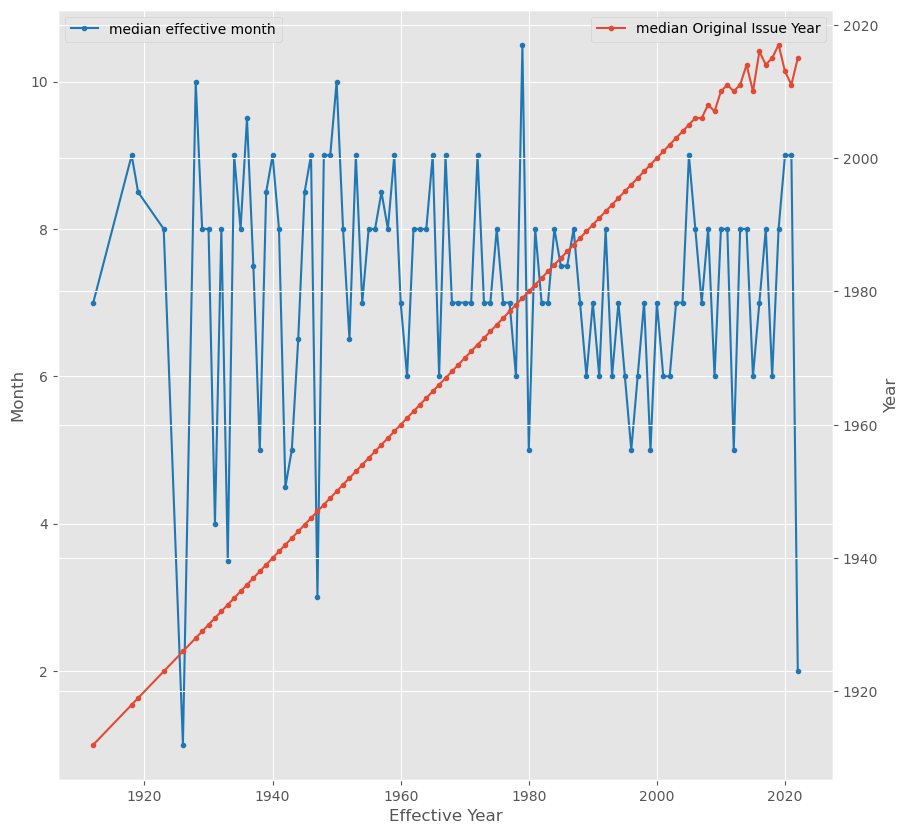

In [21]:
make_median_plot('ggplot')

I used ``twinx()`` to make the graph that different y-axes shared with the same x-axis so that we can compare the median effective month and median original year in each effective year.

## Conclusion

1. it is no different with removing null data when drawing a graph
2. To get the licenses type (the index after using groupby), use ``licenses_type = list(avg.index)``, and ``licenses_type = avg.index``, ``licenses_type = avg.column``, ``licenses_type = avg.name``, ``licenses_type = avg[0]``, and ``licenses_type = avg`` are wrong codes.
3. to adjust the axis range, use ``plt.xlim(1970,2030)`` rather than set parameters in ``set_yticks``
4. I used URL to import dataset instead of local file, so there is no relative paths